In [17]:
!pip install scikit-learn
!pip install sklearn

  Using cached scikit_learn-1.1.2-cp310-cp310-win_amd64.whl (7.4 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\python\\Lib\\site-packages\\sklearn\\linear_model\\__init__.py'
Consider using the `--user` option or check the permissions.



  Using cached sklearn-0.0-py2.py3-none-any.whl


In [18]:
from keras.datasets import mnist
from matplotlib import pyplot
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

  Using cached scikit_learn-1.1.2-cp310-cp310-win_amd64.whl (7.4 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 1.2 MB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 175.3 kB/s eta 0:00:00
     -------------------------------------- 38.6/38.6 MB 498.3 kB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=e420ca49d14f0c31583563d55e22641de78a01dfe7f768954cbbac53866c6b8f
  Stored in directory: c:\users\anand\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\python\\Lib\\site-packages\\sklearn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


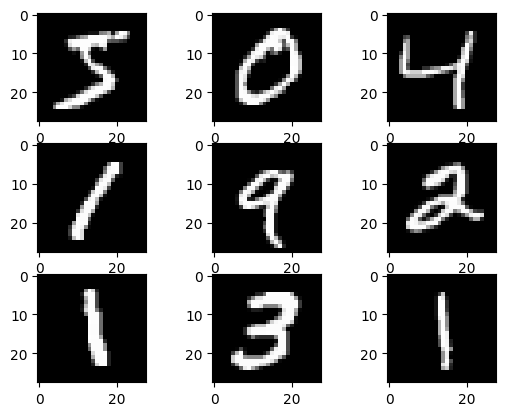

In [19]:
#loading
(train_x, train_y), (test_x, test_y) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))
 
#plotting
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [20]:
n = ((9+30)*100) + 1000
print("total dataset =",n)

t = n*0.2
print("test dataset =",t)

total dataset = 4900
test dataset = 980.0


In [21]:
(Tx , Ty) = (train_x[:4900] , train_y[:4900])
(tx, ty) = (test_x[:980] , test_y[:980])

In [22]:
Tx.shape

(4900, 28, 28)

In [23]:
Tx.shape

(4900, 28, 28)

In [24]:
Tx = Tx.flatten().reshape(len(Tx),-1)
tx = tx.flatten().reshape(len(tx),-1)

In [25]:
Tx = Tx.flatten().reshape(len(Tx),-1)
tx = tx.flatten().reshape(len(tx),-1)

(4900, 784)

In [26]:
tx.shape

(980, 784)

In [27]:
k = 30

knn = neighbors.KNeighborsClassifier(k, weights = 'uniform')
knn.fit(Tx , Ty)
pred = knn.predict(Tx)

confusion = confusion_matrix(Ty, pred)


report = classification_report(Ty, pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       469
           1       0.80      0.99      0.88       543
           2       0.99      0.84      0.91       480
           3       0.92      0.91      0.92       486
           4       0.95      0.91      0.93       530
           5       0.95      0.89      0.92       425
           6       0.94      0.97      0.95       491
           7       0.92      0.93      0.92       538
           8       0.97      0.83      0.90       456
           9       0.87      0.94      0.90       482

    accuracy                           0.92      4900
   macro avg       0.93      0.92      0.92      4900
weighted avg       0.92      0.92      0.92      4900



In [28]:
cross_val = 60
confusion = np.zeros((10,10))
for i in range(cross_val):
    knn = neighbors.KNeighborsClassifier(k, weights = 'uniform')
    knn.fit(Tx , Ty)
    pred = knn.predict(tx)
    confusion1 = confusion + confusion_matrix(ty, pred)
    confusion = confusion1
    
confusion = confusion/cross_val
print(confusion)

[[ 79.   0.   0.   0.   0.   0.   3.   0.   0.   0.]
 [  0. 123.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  3.  20.  74.   2.   1.   0.   1.   6.   4.   0.]
 [  0.   6.   1.  91.   0.   1.   1.   2.   1.   2.]
 [  0.   3.   0.   0.  96.   0.   2.   0.   0.   9.]
 [  1.   4.   0.   2.   1.  75.   2.   0.   0.   2.]
 [  2.   0.   0.   0.   1.   2.  80.   0.   0.   0.]
 [  0.   9.   0.   0.   1.   0.   0.  86.   0.   2.]
 [  3.   2.   1.   5.   2.   1.   1.   1.  67.   4.]
 [  0.   1.   0.   1.   2.   0.   0.   1.   0.  87.]]


In [29]:
report = classification_report(ty, pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        82
           1       0.73      1.00      0.85       123
           2       0.97      0.67      0.79       111
           3       0.90      0.87      0.88       105
           4       0.92      0.87      0.90       110
           5       0.95      0.86      0.90        87
           6       0.89      0.94      0.91        85
           7       0.90      0.88      0.89        98
           8       0.93      0.77      0.84        87
           9       0.82      0.95      0.88        92

    accuracy                           0.88       980
   macro avg       0.89      0.88      0.88       980
weighted avg       0.89      0.88      0.87       980



In [30]:
knn = neighbors.KNeighborsClassifier(k, weights = 'uniform')
knn.fit(Tx , Ty)
pred = knn.predict(tx)

confusion = confusion_matrix(ty, pred)

report = classification_report(ty, pred)
print(report)
confusion

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        82
           1       0.73      1.00      0.85       123
           2       0.97      0.67      0.79       111
           3       0.90      0.87      0.88       105
           4       0.92      0.87      0.90       110
           5       0.95      0.86      0.90        87
           6       0.89      0.94      0.91        85
           7       0.90      0.88      0.89        98
           8       0.93      0.77      0.84        87
           9       0.82      0.95      0.88        92

    accuracy                           0.88       980
   macro avg       0.89      0.88      0.88       980
weighted avg       0.89      0.88      0.87       980



array([[ 79,   0,   0,   0,   0,   0,   3,   0,   0,   0],
       [  0, 123,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  20,  74,   2,   1,   0,   1,   6,   4,   0],
       [  0,   6,   1,  91,   0,   1,   1,   2,   1,   2],
       [  0,   3,   0,   0,  96,   0,   2,   0,   0,   9],
       [  1,   4,   0,   2,   1,  75,   2,   0,   0,   2],
       [  2,   0,   0,   0,   1,   2,  80,   0,   0,   0],
       [  0,   9,   0,   0,   1,   0,   0,  86,   0,   2],
       [  3,   2,   1,   5,   2,   1,   1,   1,  67,   4],
       [  0,   1,   0,   1,   2,   0,   0,   1,   0,  87]], dtype=int64)